In [1]:
import json
from glob import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rc('pdf',fonttype = 42)
plt.rc('ps',fonttype = 42)
import seaborn as sns

sns.set_style('whitegrid')
sns.set_context('paper')

# rdir = '../results/lpc/results_22-05-13r1/'
# rdir = '../results/lpc/results_22-05-14/'
rdirs = [
#     '../results/lpc/results_22-05-16/'
#     '../results/lpc/results_22-05-14r1/',
    '../results_23-01-26/',
        ]
figdir='../overleaf/figs/'
def save(fig, name):
#     fig.tight_layout()
    for t in ['.pdf','.jpg']:
        plt.savefig(figdir+name+t, 
                    dpi=300,
                    bbox_inches='tight'
                   )

In [2]:
frames = []
# cols = [
#     'algorithm',
#     'random_state',
#     'time_time',
#        ]
globs = []
for rdir in rdirs:
    globs.extend(glob(rdir+'/*.json'))
for f in globs:
#     print(f)
    with open(f,'r') as file:
        try:
            d = json.load(file)
        except Exception as e:
            print('!!!Failed to load',f)
            print(e)
            continue
    frames.append(d)    
df_results = pd.DataFrame.from_records(frames)
print(len(frames),'records')
print(frames[0].keys())

df_results['ml_name'] = df_results['algorithm'].apply(lambda x: x.split('_pmc')[0].split('_mc')[0])
df_results['postprocessing'] = df_results['algorithm'].apply(lambda x: 'MC-CV' if '_mc_cv' in x else x)
df_results['postprocessing'] = df_results['postprocessing'].apply(lambda x: 'MC' if '_mc' in x else x)
df_results['postprocessing'] = df_results['postprocessing'].apply(lambda x: 'PMC-CV' if '_pmc_cv' in x else x)
df_results['postprocessing'] = df_results['postprocessing'].apply(lambda x: 'PMC' if '_pmc' in x else x)
df_results['postprocessing'] = df_results['postprocessing'].apply(lambda x: '-' if not x in ['MC','PMC','MC-CV','PMC-CV'] else x)
df_results.loc[df_results['ml_name']=='lr_cv','ml_name'] = 'lr'

df_results = df_results.loc[df_results.n_bins==10]
df_results = df_results.loc[df_results.gamma>0.01]
df_results.groupby('algorithm')['random_state'].count()

1046 records
dict_keys(['dataset', 'algorithm', 'params', 'process_time', 'time_time', 'text_encoding', 'text_features', 'random_state', 'alpha', 'n_bins', 'gamma', 'rho', 'roc_auc_train', 'auprc_train', 'accuracy_train', 'MC_loss_train', 'PMC_loss_train', 'DC_loss_train', 'roc_auc_test', 'auprc_test', 'accuracy_test', 'MC_loss_test', 'PMC_loss_test', 'DC_loss_test'])


algorithm
lr            152
lr_mc         156
lr_pmc        157
rf            149
rf_mc         134
rf_pmc        149
rf_pmc_log    149
Name: random_state, dtype: int64

In [3]:
df_results['postprocessing'].unique()

array(['MC', '-', 'PMC'], dtype=object)

In [4]:

df_results.groupby('algorithm').mean().round(3)

/tmp/ipykernel_952126/248015975.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_results.groupby('algorithm').mean().round(3)


,process_time,time_time,random_state,alpha,n_bins,gamma,rho,roc_auc_train,auprc_train,accuracy_train,MC_loss_train,PMC_loss_train,DC_loss_train,roc_auc_test,auprc_test,accuracy_test,MC_loss_test,PMC_loss_test,DC_loss_test
algorithm,,,,,,,,,,,,,,,,,,,
lr,64.013,1190.195,7474.993,0.055,10.0,0.05,0.215,0.897,0.808,0.833,0.087,0.275,0.371,0.896,0.806,0.832,0.120,0.329,0.404
lr_mc,44.299,808.074,7431.372,0.056,10.0,0.05,0.208,0.896,0.806,0.832,0.073,0.200,0.265,0.894,0.804,0.831,0.117,0.293,0.353
lr_pmc,49.702,907.595,7486.433,0.055,10.0,0.05,0.212,0.896,0.807,0.832,0.063,0.133,0.180,0.894,0.804,0.831,0.136,0.331,0.333
rf,3213.214,1220.361,7406.322,0.054,10.0,0.05,0.214,0.873,0.778,0.815,0.199,1.130,0.702,0.871,0.776,0.814,0.219,1.171,0.740
rf_mc,3196.040,1271.353,7433.022,0.060,10.0,0.05,0.212,0.872,0.779,0.820,0.104,0.564,0.376,0.870,0.775,0.818,0.171,0.718,0.480
rf_pmc,3224.066,1291.304,7572.470,0.058,10.0,0.05,0.215,0.871,0.779,0.821,0.100,0.183,0.273,0.869,0.775,0.819,0.183,0.650,0.434
rf_pmc_log,3224.723,1298.684,7388.416,0.057,10.0,0.05,0.218,0.872,0.779,0.821,0.112,0.369,0.319,0.869,0.775,0.819,0.153,0.382,0.378


In [5]:
# nice names
nice_names = {
    'roc_auc_test':'AUROC',
    'auprc_test':'AUPRC',
    'MC_loss_test':'MC loss',
    'PMC_loss_test':'PMC loss',
    'DC_loss_test':'DC loss',
    
}
nice_levels = {
    'algorithm':{
        'lr':'LR',
        'lr_mc':'LR+MC',
        'lr_mc_cv':'LR+MC-CV',
        'lr_pmc':'LR+PMC',
        'lr_pmc_cv':'LR+PMC-CV',
        'rf':'RF',
        'rf_mc':'RF+MC',
        'rf_mc_cv':'RF+MC-CV',
        'rf_pmc':'RF+PMC',
        'rf_pmc_cv':'RF+PMC_CV'
    }
}

In [6]:
import pdb
def nice_stat(x):
#     pdb.set_trace()
    return f'{x.mean():.2f}$\pm${x.sem():.2f}'
def nice_stats(x):
    return x.apply(lambda x: nice_stat(x))


In [7]:
metrics = ['roc_auc','auprc', 'MC_loss', 'PMC_loss', 'DC_loss' ]
test_metrics = [m+'_test' for m in metrics]
train_metrics = [m+'_train' for m in metrics]
# df_results.groupby('algorithm')[].mean().round(3)
df_results.groupby(['ml_name','postprocessing'])[test_metrics].mean().round(3)

# for m in test_metrics:
#     df_results[m+'_nice'] = 
df_results.groupby(['ml_name','postprocessing'])[test_metrics].apply(nice_stats)

roc_auc_test     auprc_test   MC_loss_test  \
ml_name postprocessing                                                
lr      -               0.90$\pm$0.00  0.81$\pm$0.00  0.12$\pm$0.00   
        MC              0.89$\pm$0.00  0.80$\pm$0.00  0.12$\pm$0.00   
        PMC             0.89$\pm$0.00  0.80$\pm$0.00  0.14$\pm$0.01   
rf      -               0.87$\pm$0.00  0.78$\pm$0.00  0.22$\pm$0.00   
        MC              0.87$\pm$0.00  0.78$\pm$0.00  0.17$\pm$0.01   
        PMC             0.87$\pm$0.00  0.78$\pm$0.00  0.17$\pm$0.01   

                        PMC_loss_test   DC_loss_test  
ml_name postprocessing                                
lr      -               0.33$\pm$0.01  0.40$\pm$0.01  
        MC              0.29$\pm$0.01  0.35$\pm$0.01  
        PMC             0.33$\pm$0.02  0.33$\pm$0.01  
rf      -               1.17$\pm$0.06  0.74$\pm$0.02  
        MC              0.72$\pm$0.05  0.48$\pm$0.02  
        PMC             0.52$\pm$0.05  0.41$\pm$0.01

In [8]:
df_tbl = df_results.copy()
test_metrics = ['AUROC','MC loss','PMC loss','DC loss']
df_tbl = df_tbl.rename(columns=nice_names) 
for level,nicety in nice_levels.items():
    df_tbl[level] = df_tbl[level].apply(lambda x: nicety[x] if x in nicety else x)
df_tbl.groupby(['alpha','gamma','rho','algorithm'])[test_metrics].apply(nice_stats)
df_tbl.groupby(['algorithm'])[test_metrics].apply(nice_stats)

,AUROC,MC loss,PMC loss,DC loss
algorithm,,,,
LR,0.90$\pm$0.00,0.12$\pm$0.00,0.33$\pm$0.01,0.40$\pm$0.01
LR+MC,0.89$\pm$0.00,0.12$\pm$0.00,0.29$\pm$0.01,0.35$\pm$0.01
LR+PMC,0.89$\pm$0.00,0.14$\pm$0.01,0.33$\pm$0.02,0.33$\pm$0.01
RF,0.87$\pm$0.00,0.22$\pm$0.00,1.17$\pm$0.06,0.74$\pm$0.02
RF+MC,0.87$\pm$0.00,0.17$\pm$0.01,0.72$\pm$0.05,0.48$\pm$0.02
RF+PMC,0.87$\pm$0.00,0.18$\pm$0.01,0.65$\pm$0.10,0.43$\pm$0.03
rf_pmc_log,0.87$\pm$0.00,0.15$\pm$0.01,0.38$\pm$0.02,0.38$\pm$0.01


In [9]:
df_tbl = df_results.copy()
# df_tbl = df_tbl.loc[df_tbl.n_bins==10]
# df_tbl = df_tbl.loc[df_tbl.alpha>0.01]
# df_tbl = df_tbl.loc[df_tbl.rho>0.01]
# df_tbl = df_tbl.loc[df_tbl.gamma>0.01]
test_metrics = ['AUROC','MC loss','PMC loss','DC loss']
df_tbl = df_tbl.rename(columns=nice_names) 
for level,nicety in nice_levels.items():
    df_tbl[level] = df_tbl[level].apply(lambda x: nicety[x] if x in nicety else x)
tbl = df_tbl.groupby(['n_bins','gamma','algorithm'])[test_metrics].apply(nice_stats)
# df_tbl.groupby(['algorithm'])[test_metrics].apply(nice_stats)
tbl

AUROC        MC loss       PMC loss  \
n_bins gamma algorithm                                                 
10     0.05  LR          0.90$\pm$0.00  0.12$\pm$0.00  0.33$\pm$0.01   
             LR+MC       0.89$\pm$0.00  0.12$\pm$0.00  0.29$\pm$0.01   
             LR+PMC      0.89$\pm$0.00  0.14$\pm$0.01  0.33$\pm$0.02   
             RF          0.87$\pm$0.00  0.22$\pm$0.00  1.17$\pm$0.06   
             RF+MC       0.87$\pm$0.00  0.17$\pm$0.01  0.72$\pm$0.05   
             RF+PMC      0.87$\pm$0.00  0.18$\pm$0.01  0.65$\pm$0.10   
             rf_pmc_log  0.87$\pm$0.00  0.15$\pm$0.01  0.38$\pm$0.02   

                               DC loss  
n_bins gamma algorithm                  
10     0.05  LR          0.40$\pm$0.01  
             LR+MC       0.35$\pm$0.01  
             LR+PMC      0.33$\pm$0.01  
             RF          0.74$\pm$0.02  
             RF+MC       0.48$\pm$0.02  
             RF+PMC      0.43$\pm$0.03  
             rf_pmc_log  0.38$\pm$0.01

In [10]:
tbl.apply(min)

AUROC       0.87$\pm$0.00
MC loss     0.12$\pm$0.00
PMC loss    0.29$\pm$0.01
DC loss     0.33$\pm$0.01
dtype: object

AUROC
----------------------------------------
MC loss
----------------------------------------
PMC loss
----------------------------------------
DC loss
----------------------------------------


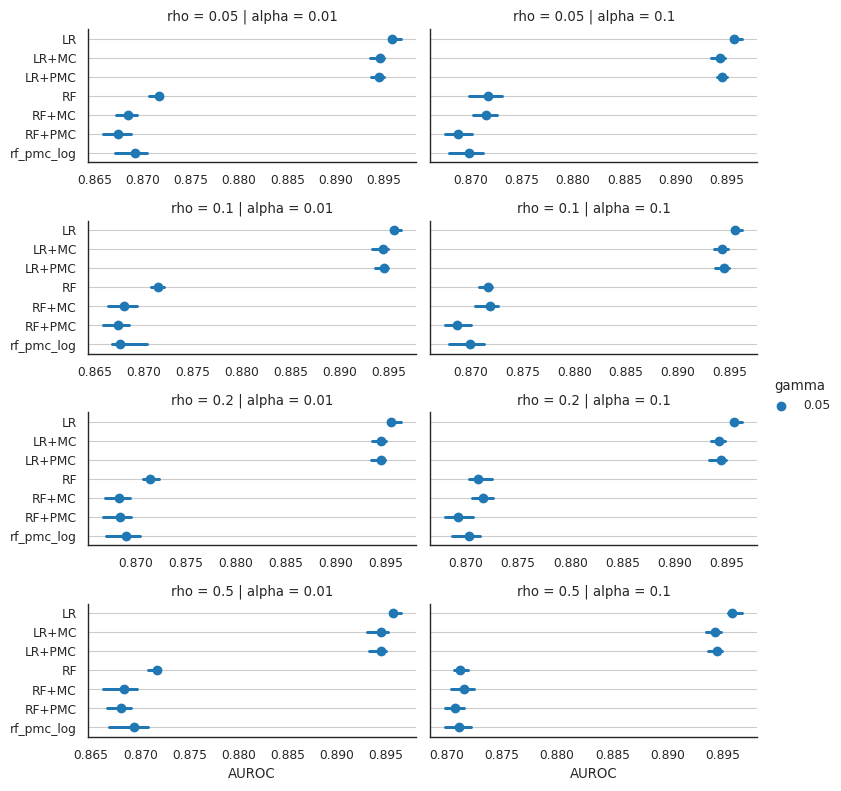

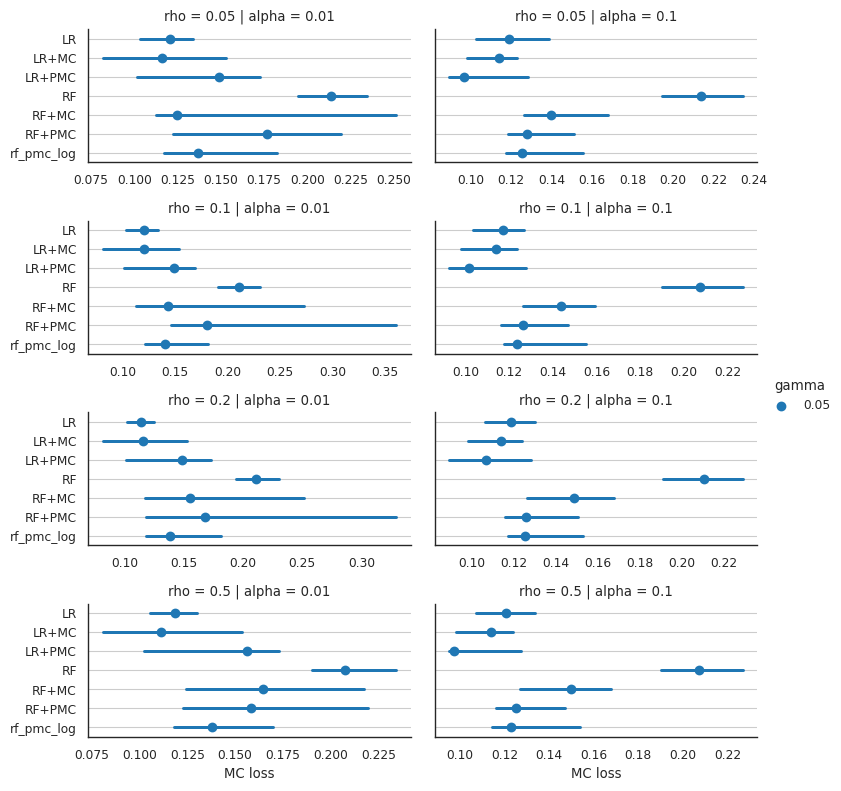

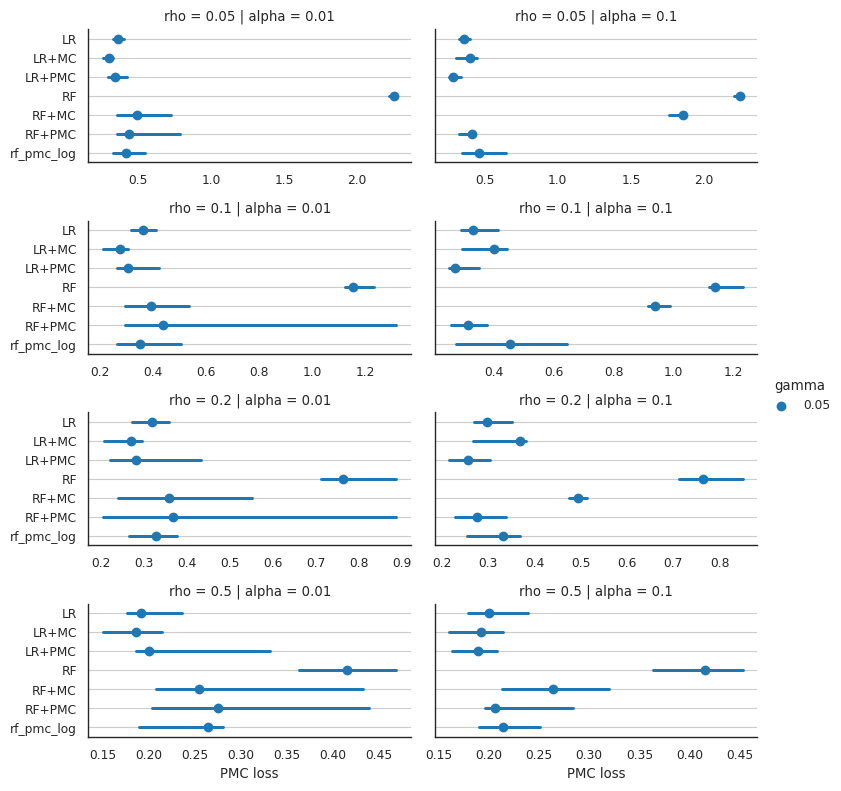

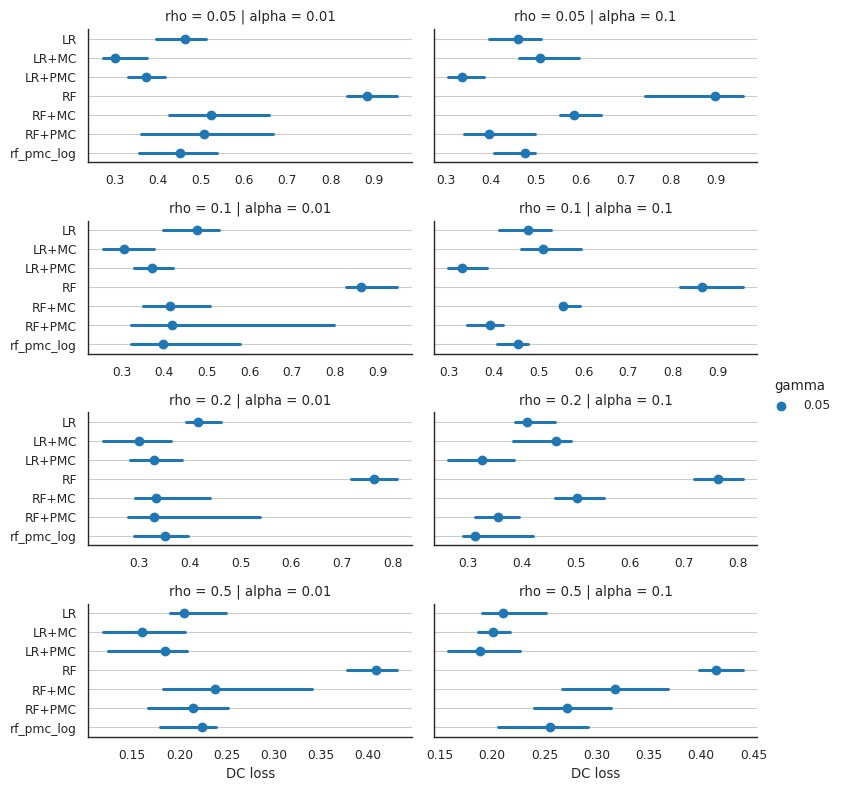

In [11]:
sns.set_style('white')
df_plt = df_results.copy()
df_plt = df_plt.rename(columns=nice_names) 
for level,nicety in nice_levels.items():
    df_plt[level] = df_plt[level].apply(lambda x: nicety[x] if x in nicety else x)
row,col,hue=('rho','alpha','gamma') 
# row,col,hue=('alpha','gamma','postprocessing') 
# row,col,hue=('gamma','rho','postprocessing') 
for m in [nice_names[t] if t in nice_names else t for t in test_metrics]:
# for m in ['roc_auc_test','MC_loss_test','PMC_loss_test','DC_loss_test']:
#     plt.figure(figsize=(10,10))
#     for row,col,hue in [('alpha','gamma','rho'),('alpha','rho'),('rho','gamma')]:
#     plt.figure()
    print(m)
    print('----------------------------------------')
    g=sns.catplot(
#         kind='box',
        kind='point',
#         dodge=True,
        join=False,
        estimator=np.median,
#         notch=True,
#         showfliers=False,
        data=df_plt,
        x=m,
#         y='algorithm',
#         y='ml_name',
        y='algorithm',
        order = df_plt.groupby('algorithm').groups.keys(),
#         x=m,
#         order=['none','MC','PMC'],
        hue=hue,
#         hue='postprocessing',
#         hue_order=['-','MC','PMC'],
        row=row,
#         col='gamma',
        col=col,
#         col='n_bins',
        facet_kws=dict(sharex=False),
#         facet_kws=dict(sharey=False),
        sharex=False,
#         sharey=False,
        aspect=2,
        height=2
    )
# g.set(grid=True,axis='y')
    for ax in g.axes.flat:
        ax.yaxis.grid(True)
        ax.set_ylabel('')

In [12]:
from statannotations.Annotator import Annotator
import ipdb
# sns.set_style('whitegrid')

def make_plot(df_results, kind='box', plot_kwargs={}, facet_kwargs={}):
    df_plt = df_results.copy()
    df_plt = df_plt.rename(columns=nice_names) 
    for level,nicety in nice_levels.items():
        df_plt[level] = df_plt[level].apply(lambda x: nicety[x] if x in nicety else x)

    order=list(df_plt.groupby('algorithm').groups.keys())

    common_plot_kwargs = dict(
          order=order,
          orient="h",
#           palette="Spectral",
    )
    common_plot_kwargs.update(plot_kwargs)
    
    plot_args = dict(
       box=dict( 
            func=sns.boxplot, 
            showfliers=False,
            notch=True,
            dodge=False,
       ),
       point=dict(
          func=sns.pointplot, 
#           size=10,
#           jitter=False,
          join=False,
       ),
       violin=dict(  
          func=sns.violinplot, 
          dodge=False,
       )
    )
    
    x_vars=[
        'AUROC',
        'MC loss',
        'PMC loss',
        'DC loss'
    ]
    pairgrid_kwargs = dict(
        data=df_plt, 
        x_vars=x_vars,
        y_vars=['algorithm'],
        hue='postprocessing',
        aspect=0.8
    )
    pairgrid_kwargs.update(facet_kwargs)
    g = sns.PairGrid( **pairgrid_kwargs )

    # Draw a dot plot 
    g.map(**plot_args[kind],**common_plot_kwargs)
    # stat annotation pairs
    pairs=[
           ("LR", "LR+MC"), ("LR", "LR+PMC"), ("LR+MC", "LR+PMC"),
           ("RF", "RF+MC"), ("RF", "RF+PMC"), ("RF+MC", "RF+PMC")
          ]

    for (ax,x) in zip(g.axes.flat, x_vars):
        ax.yaxis.grid(True)
        ax.xaxis.grid(False)
        ax.set_ylabel('')
        xticks = ax.get_xticks()
        xticklabs = ax.get_xticklabels()
#             ax.set_xtick
        print(x)
        print('.......')
        annotator = Annotator(
            ax,
            pairs, 
            data=df_plt, 
            x=x, 
            y='algorithm', 
    #             hue='postprocessing',
            orient='h',
            order=order
        )
        annotator.configure(test='Mann-Whitney', 
                            comparisons_correction="Bonferroni",
                            text_format='star', 
                            loc='inside')
        annotator.apply_and_annotate()
        print('........................................')
        
        if x == 'PMC loss':
            ax.set_xlim(left=0.0)
#         if x == 'AUROC':
#             ax.set_xticks(xticks)
#             ax.set_xticklabels(xticklabs)
#             ax.set_xticklabels(ax.get_xticklabels())
#             ax.set_xlim(ax.get_xlim())
#             newxticklabs = ax.get_xticklabels()
    save(g, f'{kind}_AUROC_MC_PMC_DC')
    return g

/home/bill/miniconda3/envs/pmcpaper/lib/python3.9/site-packages/seaborn/axisgrid.py:1609: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 99)` for the same effect.

  func(x=x, y=y, **kwargs)
/home/bill/miniconda3/envs/pmcpaper/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/bill/miniconda3/envs/pmcpaper/lib/python3.9/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/bill/miniconda3/envs/pmcpaper/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/bill/miniconda3/envs/pmcpaper/lib/python3.9/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/bill/miniconda3/envs/pmcpaper/li

/home/bill/miniconda3/envs/pmcpaper/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/bill/miniconda3/envs/pmcpaper/lib/python3.9/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/bill/miniconda3/envs/pmcpaper/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/bill/miniconda3/envs/pmcpaper/lib/python3.9/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/bill/miniconda3/envs/pmcpaper/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/bill/miniconda3/envs/pmcpaper/lib/python3.9/site-packages/numpy/

AUROC
.......
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

LR vs. LR+MC: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:1.849e-18 U_stat=1.886e+04
LR+MC vs. LR+PMC: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:1.000e+00 U_stat=1.183e+04
RF vs. RF+MC: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:1.470e-05 U_stat=1.322e+04
RF+MC vs. RF+PMC: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:1.597e-05 U_stat=1.321e+04
LR vs. LR+PMC: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:4.674e-17 U_stat=1.869e+04
RF vs. RF+PMC: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:1.038e-23 U_stat=1.870e+04
........................................
MC loss
.......


/home/bill/miniconda3/envs/pmcpaper/lib/python3.9/site-packages/statannotations/_Plotter.py:337: UserWarning: Invalid x-position found. Are the same parameters passed to seaborn and statannotations calls? or are there few data points?
  warnings.warn(
/home/bill/miniconda3/envs/pmcpaper/lib/python3.9/site-packages/statannotations/_Plotter.py:337: UserWarning: Invalid x-position found. Are the same parameters passed to seaborn and statannotations calls? or are there few data points?
  warnings.warn(
/home/bill/miniconda3/envs/pmcpaper/lib/python3.9/site-packages/statannotations/_Plotter.py:337: UserWarning: Invalid x-position found. Are the same parameters passed to seaborn and statannotations calls? or are there few data points?
  warnings.warn(


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

LR vs. LR+MC: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:3.991e-01 U_stat=1.329e+04
LR+MC vs. LR+PMC: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:1.000e+00 U_stat=1.122e+04
RF vs. RF+MC: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:6.495e-20 U_stat=1.639e+04
RF+MC vs. RF+PMC: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:1.000e+00 U_stat=1.055e+04
LR vs. LR+PMC: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:1.000e+00 U_stat=1.196e+04
RF vs. RF+PMC: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:8.177e-20 U_stat=1.802e+04
........................................
PMC loss
.......
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.

/home/bill/miniconda3/envs/pmcpaper/lib/python3.9/site-packages/statannotations/_Plotter.py:337: UserWarning: Invalid x-position found. Are the same parameters passed to seaborn and statannotations calls? or are there few data points?
  warnings.warn(
/home/bill/miniconda3/envs/pmcpaper/lib/python3.9/site-packages/statannotations/_Plotter.py:337: UserWarning: Invalid x-position found. Are the same parameters passed to seaborn and statannotations calls? or are there few data points?
  warnings.warn(
/home/bill/miniconda3/envs/pmcpaper/lib/python3.9/site-packages/statannotations/_Plotter.py:337: UserWarning: Invalid x-position found. Are the same parameters passed to seaborn and statannotations calls? or are there few data points?
  warnings.warn(


LR+MC vs. LR+PMC: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:1.000e+00 U_stat=1.227e+04
RF vs. RF+MC: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:5.935e-10 U_stat=1.443e+04
RF+MC vs. RF+PMC: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:6.626e-06 U_stat=1.333e+04
LR vs. LR+PMC: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:3.310e-01 U_stat=1.344e+04
RF vs. RF+PMC: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:1.425e-24 U_stat=1.884e+04
........................................
DC loss
.......
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

LR vs. LR+MC: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:3.309e-02 U_stat=1.402e+04


/home/bill/miniconda3/envs/pmcpaper/lib/python3.9/site-packages/statannotations/_Plotter.py:337: UserWarning: Invalid x-position found. Are the same parameters passed to seaborn and statannotations calls? or are there few data points?
  warnings.warn(
/home/bill/miniconda3/envs/pmcpaper/lib/python3.9/site-packages/statannotations/_Plotter.py:337: UserWarning: Invalid x-position found. Are the same parameters passed to seaborn and statannotations calls? or are there few data points?
  warnings.warn(
/home/bill/miniconda3/envs/pmcpaper/lib/python3.9/site-packages/statannotations/_Plotter.py:337: UserWarning: Invalid x-position found. Are the same parameters passed to seaborn and statannotations calls? or are there few data points?
  warnings.warn(


LR+MC vs. LR+PMC: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:1.000e+00 U_stat=1.316e+04
RF vs. RF+MC: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:6.616e-18 U_stat=1.605e+04
RF+MC vs. RF+PMC: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:1.350e-04 U_stat=1.290e+04
LR vs. LR+PMC: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:1.102e-05 U_stat=1.568e+04
RF vs. RF+PMC: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:7.794e-26 U_stat=1.904e+04
........................................


FileNotFoundError: [Errno 2] No such file or directory: '../overleaf/figs/point_AUROC_MC_PMC_DC.pdf'

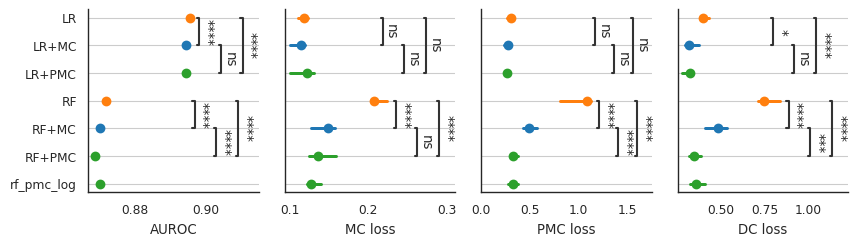

In [14]:
g = make_plot(
    df_results, 
    kind='point', 
    plot_kwargs=dict(
#         saturation=0.5,
        ci=99,
#         legend_out=True,
        estimator=np.median
    ),
    facet_kwargs=dict(
        aspect=.85,
    )
)

In [ ]:
make_plot(
    df_results, kind='box', 
    plot_kwargs=dict(saturation=0.9,
                     palette='Set2'
                    ),
    facet_kwargs=dict(aspect=0.85)
)

In [ ]:
make_plot(df_results, kind='violin')

In [15]:
# pct difference btw RF / LR with and without PMC/MC

df_results
df = df_tbl.groupby('algorithm')[test_metrics].apply(np.mean)

for metric in test_metrics:
    print(metric)
    for m in ['LR','RF']:
#         print('\t',m)
        for post in ['MC','PMC']:
#             print('\t\t',post)
            a = df.loc[m,metric] 
            b = df.loc[f'{m}+{post}',metric]
            pct= 100*((a-b)/a)
            print('\t\t\t',m,post,'% diff:',round(pct,2))
    print('---')

AUROC
			 LR MC % diff: 0.17
			 LR PMC % diff: 0.16
			 RF MC % diff: 0.16
			 RF PMC % diff: 0.33
---
MC loss
			 LR MC % diff: 3.11
			 LR PMC % diff: -13.26
			 RF MC % diff: 22.04
			 RF PMC % diff: 16.76
---
PMC loss
			 LR MC % diff: 10.94
			 LR PMC % diff: -0.58
			 RF MC % diff: 38.64
			 RF PMC % diff: 44.47
---
DC loss
			 LR MC % diff: 12.54
			 LR PMC % diff: 17.42
			 RF MC % diff: 35.06
			 RF PMC % diff: 41.33
---


/home/bill/miniconda3/envs/pmcpaper/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
